In [2]:
import numpy as np
import pandas as pd

In [3]:
detector1_filename = "./FileC010.txt"

col_names_list = ["Event", 'Time', 'Date', 'TimeStamp[ms]', 'ADC1', 'ADC2', 'SiPM[mV]', 'Temp[C]', 'Pressure[Pa]', 'DeadTime[us]', 'Coincident', 'ID']

data1 = pd.read_csv(detector1_filename, skiprows=7, sep="\t", names = col_names_list, index_col=False)#.set_index("Event")

In [4]:
data1

,Event,Time,Date,TimeStamp[ms],ADC1,ADC2,SiPM[mV],Temp[C],Pressure[Pa],DeadTime[us],Coincident,ID
0,1,21:37:14,26/4/2022,86,68.0,7.0,5.95,30.25,101010.12,47972,0,Umbriel
1,2,21:37:14,26/4/2022,461,156.0,7.0,8.18,30.25,101010.12,5940,0,Umbriel
2,3,21:37:14,26/4/2022,630,647.0,11.0,15.04,30.25,101010.12,49818,0,Umbriel
3,4,21:37:14,26/4/2022,853,439.0,8.0,12.41,30.25,101009.78,1849,0,Umbriel
4,5,21:37:15,26/4/2022,1251,680.0,15.0,16.44,30.25,101009.61,1848,0,Umbriel
...,...,...,...,...,...,...,...,...,...,...,...,...
7653,7654,22:19:32,26/4/2022,2537659,102.0,7.0,6.64,29.09,100930.36,51809,0,Umbriel
7654,7655,22:19:32,26/4/2022,2537951,333.0,8.0,11.47,29.09,100930.36,1851,0,Umbriel
7655,7656,22:19:32,26/4/2022,2538085,958.0,279.0,53.87,29.09,100930.36,1847,0,Umbriel
7656,7657,22:19:33,26/4/2022,2538476,198.0,8.0,9.25,29.09,100930.36,1850,0,Umbriel


In [5]:
timestamps = data1['TimeStamp[ms]'].to_numpy()

coincidence = data1['Coincident'].to_numpy()


In [6]:
timestamps

array([     86,     461,     630, ..., 2538085, 2538476, 2538697],
      dtype=int64)

In [7]:
np.sum(coincidence) # number of coincident hits

my_list = [p for p in range(4)]
my_list

[0, 1, 2, 3]

In [8]:
binwidth = 1000*10 # in milliseconds
time_bins = np.arange(min(timestamps), max(timestamps) + binwidth, binwidth)

binned_coincidence = [np.sum(coincidence[np.where((timestamps > low) & (timestamps <= high))]) for low, high in zip(time_bins[:-1], time_bins[1:])]


(array([94., 88., 46., 19.,  5.,  2.,  0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 7 artists>)

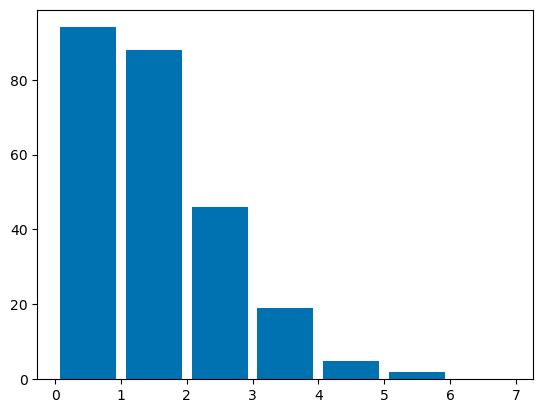

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

plt.hist(binned_coincidence, bins=range(8), rwidth=0.85)